### **Projeto**:

Nós atuaremos como cientistas de dados em uma **consultoria** que presta serviços para diversas empresas. Atualmente, estamos acompanhando uma **rede de varejo** que atende todo o Brasil. Nosso objetivo é, por meio da **estatística e da análise de dados**, responder diversos casos que auxiliarão na **tomada de decisão** e na geração de **insights** para esses clientes. Faremos isso utilizando dados coletados de diversos setores dessa empresa, como **RH**, **vendas**, **marketing** e **financeiro**. Nós iremos:

- Identificar tipos de dados

- Explorar problemas

- Aplicar medidas

- Gerar insights

- Levantar hipóteses

In [1]:
import pandas as pd

Realizando a leitura da nossa primeira base de dados para a análise do perfil da nossa clientela de acordo, com as compras que realizaram.

In [2]:
#importando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/estatistica-r-frequencias-medidas/refs/heads/main/dados/vendas_ecommerce.csv'
#lendo os dados
df = pd.read_csv(url)

In [3]:
#visualizando as primeiras linhas de df
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5


In [4]:
#verificando a quantidade de linhas e colunas do df
df.shape

(200000, 10)

In [5]:
#verificar informações mais detalhadas do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_compra          200000 non-null  object 
 1   sexo_biologico     200000 non-null  object 
 2   idade_cliente      200000 non-null  int64  
 3   regiao_cliente     200000 non-null  object 
 4   categoria_produto  200000 non-null  object 
 5   preco_unitario     200000 non-null  float64
 6   quantidade         200000 non-null  int64  
 7   total_compra       200000 non-null  float64
 8   tempo_entrega      200000 non-null  int64  
 9   avaliacao          200000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 15.3+ MB


Iremos realizar uma análise simples, investigando uma variável **qualitativa nominal** como, por exemplo, a quantidade de vendas por categoria

In [6]:
#visualizando a coluna de categoria
df['categoria_produto']

0              Ferramentas e Construção
1                   Alimentos e Bebidas
2                           Eletrônicos
3                           Eletrônicos
4                Papelaria e Escritório
                      ...              
199995                      Eletrônicos
199996                      Eletrônicos
199997    Roupas, Calçados e Acessórios
199998              Alimentos e Bebidas
199999       Beleza e Cuidados Pessoais
Name: categoria_produto, Length: 200000, dtype: object

In [7]:
#utilizando a função unique() para mostrar apenas uma categoria de produto por vez
df['categoria_produto'].unique()

array(['Ferramentas e Construção', 'Alimentos e Bebidas', 'Eletrônicos',
       'Papelaria e Escritório', 'Beleza e Cuidados Pessoais',
       'Casa e Mobílias', 'Roupas, Calçados e Acessórios', 'Livros',
       'Brinquedos', 'Esporte e Lazer'], dtype=object)

In [8]:
#verificar a quantidade de vendas por categoria
df['categoria_produto'].value_counts()

categoria_produto
Eletrônicos                      36060
Roupas, Calçados e Acessórios    27917
Casa e Mobílias                  26015
Beleza e Cuidados Pessoais       22026
Esporte e Lazer                  19939
Alimentos e Bebidas              18022
Papelaria e Escritório           13936
Livros                           13790
Ferramentas e Construção         12063
Brinquedos                       10232
Name: count, dtype: int64

In [9]:
#para plotar devemos tornar a coluna em DataFrame
produtos = df['categoria_produto'].value_counts().reset_index()
produtos

,categoria_produto,count
0,Eletrônicos,36060
1,"Roupas, Calçados e Acessórios",27917
2,Casa e Mobílias,26015
3,Beleza e Cuidados Pessoais,22026
4,Esporte e Lazer,19939
5,Alimentos e Bebidas,18022
6,Papelaria e Escritório,13936
7,Livros,13790
8,Ferramentas e Construção,12063
9,Brinquedos,10232


In [10]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

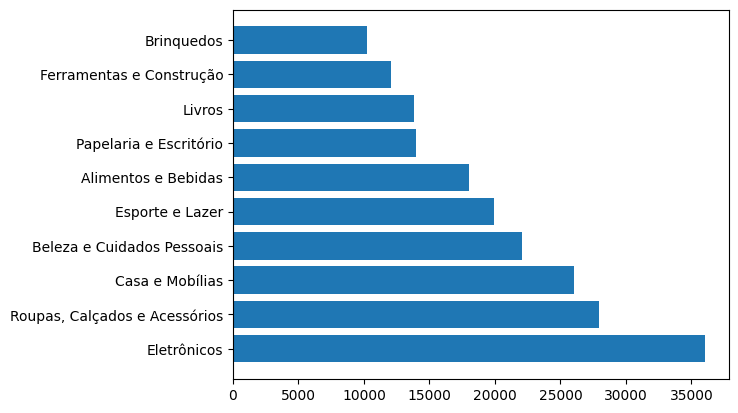

In [11]:
#plotando gráfico em barras na horizontal
plt.barh(produtos['categoria_produto'], produtos['count'])
plt.show

### **Manipulando dados qualitativos ordinais**

In [12]:
#ordenando os dados
sorted(df['avaliacao'].unique())

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

#### **O que é o Categorical**?

Em Python, o **Categorical** do pandas é usado para representar **variáveis categóricas**. Ele permite armazenar as categorias de forma eficiente e, no caso de **variáveis ordinais**, definir uma ordem específica para elas. Isso facilita a **manipulação e análise dos dados**.

*Exemplo*:

Uma empresa realiza uma pesquisa de satisfação com clientes e coleta os seguintes dados:

**cliente_id**: Número de identificação do cliente **(nominal)**.
**nivel_satisfacao**: Respostas codificadas como 1 (Insatisfeito), 2 (Neutro), 3 (Satisfeito) **(ordinal)**.

O objetivo é transformar essas variáveis corretamente utilizando **Categorical** e visualizar a alteração. Podemos fazer isso da seguinte forma:

- DataFrame de exemplo\
dados = pd.DataFrame({\
    'cliente_id': [101, 102, 103, 104, 105],\
    'nivel_satisfacao': [3, 2, 1, 3, 2]\
})

-  Convertendo nivel_satisfacao em uma categoria ordinal\
dados['nivel_satisfacao'] = pd.Categorical(\
    dados['nivel_satisfacao'],\
    categories=[1, 2, 3],\
    ordered=True\
)

avaliacao_labels = {1: 'Insatisfeito', 2: 'Neutro', 3: 'Satisfeito'}\
dados['nivel_satisfacao'] = dados['nivel_satisfacao'].map(avaliacao_labels)

-  Ordenando os dados pela coluna 'nivel_satisfacao'\
dados_sorted = dados.sort_values('nivel_satisfacao', ascending=False)

dados_sorted

O **Categorical** pode auxiliar em diversas situações na ciência de dados e análise com Python, como:

- **Análise Estatística**: Para definir variáveis categóricas e quais estatísticas descritivas aplicar nesses casos.
- **Visualização de Dados**: Facilita a criação de gráficos categóricos, como gráficos de barras, usando bibliotecas como Matplotlib e Seaborn.
- **Machine Learning**: Prepara variáveis categóricas para algoritmos que não aceitam dados numéricos diretamente.
- **Manipulação de Dados**: Permite ordenações e agrupamentos em tabelas e relatórios.

Logo, transformar variáveis numéricas que expressam variáveis categóricas em Categorical garante maior precisão e facilita a interpretação em análises qualitativas.

In [13]:
#criando uma coluna categórica
df['avaliacao indicador'] = pd.Categorical(
    df['avaliacao'],
    categories = [1, 2, 3, 4, 5],
    ordered=True
)

In [14]:
#realizando o mapeamento 
avaliacao_labels = {1: 'Péssimo', 2: 'Ruim', 3: 'Regular', 4: 'Bom', 5: 'Ótimo'}
df['avaliacao indicador'] = df['avaliacao indicador'].map(avaliacao_labels)

In [15]:
#visualizando
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1,Péssimo
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4,Bom
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo


In [16]:
#removendo os valores duplicados
df_unico = df[['avaliacao', 'avaliacao indicador']].drop_duplicates()
df_unico

,avaliacao,avaliacao indicador
0,1,Péssimo
1,4,Bom
2,5,Ótimo
8,3,Regular
14,2,Ruim


#### **Diferenciando dados discretos e contínuos**

- **Discretos**: valores inteiros e contáveis *(Ex: quantidade de produto)*
- **Contínuos**: qualquer valor em um intervalo *(Ex: altura de pessoas)*

In [17]:
#verificando os valores únicos da coluna quantidade
df['quantidade'].unique()

array([ 2,  1,  8,  5,  3,  7,  6,  4, 10,  9])

Verificamos que essa variá do tipo **discreto**

In [18]:
#passando a mensagem que será exibida
print(f"Vendemos de {min(df['quantidade'])} até {max(df['quantidade'])} unidades de produto por registro")

Vendemos de 1 até 10 unidades de produto por registro


In [19]:
#verificando os valores da coluna total_compra
df['total_compra'].unique()

array([  193.6 ,   247.68,  1254.92, ..., 13183.8 ,  1666.33,  1193.03],
      shape=(141854,))

Nesse caso, essa variável é do tipo **contínuo**

In [20]:
#exibindo a mensagem
print(f"Tivemos vendas a partir de R$ {min(df['total_compra']):,.2f} até R$ {max(df['total_compra']):,.2f}")

Tivemos vendas a partir de R$ 5.05 até R$ 20,744.70


In [21]:
#podemos ordenar o DataFrame para identificar também o velor mínimo e máximo
df.sort_values(by='total_compra')

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
157075,b866504d-9fe1-4c75-8956-decf7f25dd75,Masculino,35,Sudeste,Papelaria e Escritório,5.05,1,5.05,13,4,Bom
4562,5a66b58a-2ab0-49c3-b597-f45846130ded,Feminino,37,Norte,Papelaria e Escritório,5.14,1,5.14,11,2,Ruim
6279,c67e996c-403c-4f58-81c5-996c1ab676a5,Masculino,34,Sul,Papelaria e Escritório,5.28,1,5.28,7,3,Regular
50155,e7ad75b4-6a0e-4609-801c-ef12adeb837a,Masculino,55,Sudeste,Papelaria e Escritório,5.35,1,5.35,11,5,Ótimo
85703,ed88c6a2-2fdd-4278-bfa8-fd54f7e2f357,Feminino,42,Centro-Oeste,Papelaria e Escritório,5.78,1,5.78,16,4,Bom
...,...,...,...,...,...,...,...,...,...,...,...
88073,5f125e88-f01c-4499-9a25-c4910bc76dee,Masculino,39,Nordeste,Eletrônicos,2037.44,10,20374.40,7,2,Ruim
134287,2c3853dc-b9dc-400a-bd70-ff2521fe4d8a,Feminino,35,Sul,Eletrônicos,2057.76,10,20577.60,6,2,Ruim
17790,dbf2429a-3252-42df-ad4e-a11339afceb8,Feminino,33,Sudeste,Eletrônicos,2058.18,10,20581.80,4,5,Ótimo
114561,dc3c4162-5772-480e-b7fa-0ccc41d78a40,Feminino,29,Sudeste,Eletrônicos,2058.77,10,20587.70,6,5,Ótimo


### Demanda 1: **Acompanhamento das avaliações dos clientes**

A empresa que acompanhar as **avaliações dos clientes** sobre seus produtos a fim de priorizar ações, como melhorar produtos com maior proporção
de feedbacks negativos, investigar causas e explorar pontos fortes apontados pelos clientes satisfeitos. Essas avaliações variam entre:

1. Péssimo
2. Ruim
3. Regular
4. Bom
5. Ótimo

Como a **equipe de marketing e vendas** poderá investigar a percepção geral dos clientes sobre os produtos e identificar possíveis comportamentos
para ajustar suas estratégias de comunicação e melhoria de produtos?

### Solução:

#### **Distribuição de frequência**

Para essa análise, utilizaremos a **distribuição de frequência**, que mostra a quantidade de vezes que uma variável ocorre. Por exemplo, para saber **quantas vezes a avaliação "péssima" foi registrada**, **ordenamos os valores**, **determinamos a frequência** e **agrupamos os dados por categorias**.

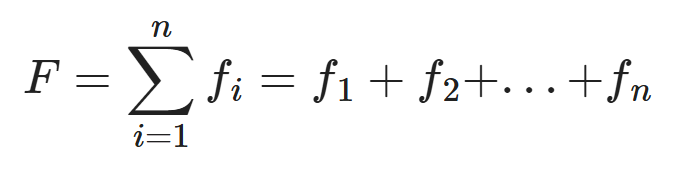

- **Fórmula matemática de frequência absoluta**: A expressão indica que F igual a iniciaSomatório de i igual a 1 até n de f índice i fimSomatório igual a f índice 1 somado a f índice 2 somado a reticências somado a f índice n.



In [22]:
#visualizar a estrutura dos dados
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1,Péssimo
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4,Bom
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo


In [27]:
#criando novo DataFrame recebendo a frequência
freq_avaliacoes = (df.groupby('avaliacao indicador', observed=False)
                  .size()
                  .reset_index(name='freq_absoluta')
                  .sort_values(by='avaliacao indicador', ascending=False))
#visualizando o novo DataFrame
freq_avaliacoes

,avaliacao indicador,freq_absoluta
4,Ótimo,66076
3,Bom,40980
2,Regular,32282
1,Ruim,28239
0,Péssimo,32423


#### **Frequência Relativa**

Para obter esse resultado de maneira ainda mais clara através da **frequência relativa**.

- Ela é dada pela razão entre a frequência absoluta de cada classe e a frequência total ou soma das frequências absolutas:

  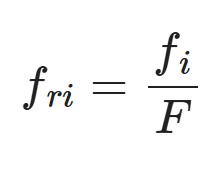

Para valores percentuais, basta multiplicar cada frequência relativa por 100.

In [28]:
#criando a frequência relativa
freq_avaliacoes['freq_relativa'] = round((freq_avaliacoes['freq_absoluta'] / freq_avaliacoes['freq_absoluta'].sum()) * 100, 1)

In [30]:
freq_avaliacoes

,avaliacao indicador,freq_absoluta,freq_relativa
4,Ótimo,66076,33.0
3,Bom,40980,20.5
2,Regular,32282,16.1
1,Ruim,28239,14.1
0,Péssimo,32423,16.2


In [31]:
#renomeando as colunas
freq_avaliacoes.columns = ['Avaliação', 'Quantidade', 'Porcentagem (%)']

In [32]:
freq_avaliacoes

,Avaliação,Quantidade,Porcentagem (%)
4,Ótimo,66076,33.0
3,Bom,40980,20.5
2,Regular,32282,16.1
1,Ruim,28239,14.1
0,Péssimo,32423,16.2


In [33]:
import seaborn as sns

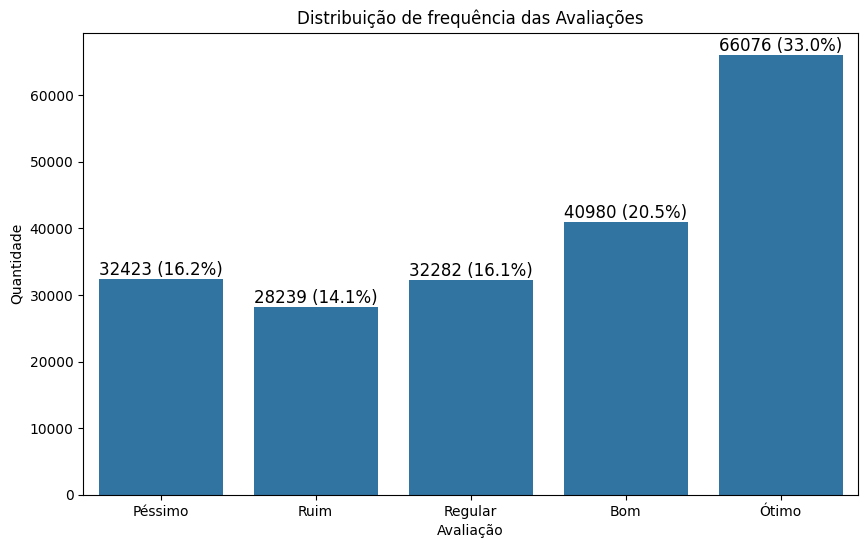

In [34]:
#plotando gráfico para visualizar os dados
plt.figure(figsize=(10, 6))
sns.barplot(data=freq_avaliacoes, x='Avaliação', y='Quantidade')

#adicionando título e rótulos aos eixos
plt.title('Distribuição de frequência das Avaliações')
plt.xlabel('Avaliação')
plt.ylabel('Quantidade')

#adicionando os rótulos com valores de frequência e porcentagem
for index, row in freq_avaliacoes.iterrows():
    plt.text(index, row['Quantidade'] + 0.1, f"{row['Quantidade']} ({row['Porcentagem (%)']:.1f}%)",
             ha='center', va='bottom', fontsize=12)

plt.show()

### Demanda 2: **Analisando as avaliações por região**

A equipe de marketing e vendas trouxe uma nova demanda para a análise das avaliações. Além de entender o comportamento geral das avaliações, que foi, o que fizemos anteriormente, agora eles desejam saber como essas avaliações variam conforme a **região do país**.

Nosso objetivo é identificar como as percepções dos clientes variam **regionalmente**, respondendo a questão como:

- Qual região tem mais avaliações positivas?

- Alguma região concentra a maior parte das avaliações negativas?

- Existe alguma diferença relevante que indique a necessidade de ações específicas para algumas regiões?

### **Solução**:

#### **Tabela de Contigência (distribuição de frequência bivariada)**

A **tabela de contingência**, também conhecida como tabela cruzada ou **tabela bidirecional**, tem o objetivo de representar de forma resumida
a relação entre diferentes **variáveis categóricas**. Ela é uma espécie de **distribuição de frequência entre 2 variáveis** que analisa a relação entre as variáveis qualitativas, sejam elas dependentes ou independentes.

Geralmente, ela é construída com base em dadosqualitativos, os quais são divídidos em grupos mutuamente exclusivos. Por exemplo: **quantidade de pessoas por sexo biológico e grau de instrução.

Uma das principais utilizações de uma tabela de contingência é **analisar a relação** entre dados que não são facilmente identificáveis.

In [36]:
#gerando a tabela de contingência
tab_avaliacoes_regiao = pd.crosstab(df['avaliacao indicador'], df['regiao_cliente'])
tab_avaliacoes_regiao

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
avaliacao indicador,,,,,
Péssimo,5005,7880,2757,9838,6943
Ruim,4473,6809,2545,8810,5602
Regular,3587,5701,3811,13454,5729
Bom,7378,11834,3058,11845,6865
Ótimo,11124,17343,5490,20656,11463


#### **As vantagens de uma tabela de contingência**:

- **Visualização das informações**: organiza dados categóricos num formato compacto e legível, que podem ser transformadas em gráficos;

- **Análises rápidas**: correlaciona variáveis de forma rápida e visual, auxiliando na tomada de decisões informadas e com agilidade;

- **Testes estatísticos**: serve como base para realizar testes estatísticos a fim de avaliar a independência entre variáveis categóricas.

In [38]:
#criando a tabela de contingência com os valores relativvos
tab_avaliacoes_regiao_relativa = pd.crosstab(df['avaliacao indicador'], df['regiao_cliente'], normalize='columns') * 100

tab_avaliacoes_regiao_relativa = round(tab_avaliacoes_regiao_relativa, 1)

tab_avaliacoes_regiao_relativa

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
avaliacao indicador,,,,,
Péssimo,15.9,15.9,15.6,15.2,19.0
Ruim,14.2,13.7,14.4,13.6,15.3
Regular,11.4,11.5,21.6,20.8,15.7
Bom,23.4,23.9,17.3,18.3,18.8
Ótimo,35.2,35.0,31.1,32.0,31.3


### ***Qual região tem mais avaliações positivas***?

Considerando "**Ótimo**" e "**Bom**" as **Regiões Centro-Oeste e Nordeste** dividem o ranking de avaliações mais positivas com mais de **55% de satisfação** com as compras

In [39]:
#inserindo o filtro para exibir as regiões que tem mais avaliações positivas
tab_avaliacoes_filtrada = tab_avaliacoes_regiao_relativa[tab_avaliacoes_regiao_relativa.index.isin(['Ótimo', 'Bom'])]

resultado = tab_avaliacoes_filtrada.sum()
resultado

regiao_cliente
Centro-Oeste    58.6
Nordeste        58.9
Norte           48.4
Sudeste         50.3
Sul             50.1
dtype: float64

### ***Alguma região concentra a maioria das avaliações negativas***?

Analisando a tabela de valores absolutos, conseguimos notar que a **Região Sul** tem a maior porcentagem de avaliações negativas (34,3%), sendo a única com quase 20% das notas no nível de satisfação "**Péssimo**".

In [42]:
tab_avaliacoes_filtrada = tab_avaliacoes_regiao_relativa[tab_avaliacoes_regiao_relativa.index.isin(['Ruim', 'Péssimo'])]

resultado = tab_avaliacoes_filtrada.sum()
resultado

regiao_cliente
Centro-Oeste    30.1
Nordeste        29.6
Norte           30.0
Sudeste         28.8
Sul             34.3
dtype: float64

### ***Existe alguma diferença relevante que indique a necessidade de ações específicas para uma região***?

Sim! Como visto anteriormente, é necessário investigar a **baixa avaliação na Região Sul** comparada às outras regiões. Outro ponto de atenção está também nas **Regiões Sudeste e Norte que concentram cada uma mais de 20% de notas "Regular"**.
Seriam pontos interessantes de reportar as partes interessadas!